<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Part-1:-2018-US-House-Elections-Data---Continued" data-toc-modified-id="Part-1:-2018-US-House-Elections-Data---Continued-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Part 1: 2018 US House Elections Data - Continued</a></span><ul class="toc-item"><li><span><a href="#Question-1a:-Empirical-Uncertainty-Estimation" data-toc-modified-id="Question-1a:-Empirical-Uncertainty-Estimation-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Question 1a: Empirical Uncertainty Estimation</a></span></li><li><span><a href="#Question-1b.-Visualize-Empirical-Error-Bars" data-toc-modified-id="Question-1b.-Visualize-Empirical-Error-Bars-1.2"><span class="toc-item-num">1.2&nbsp;&nbsp;</span>Question 1b. Visualize Empirical Error Bars</a></span></li><li><span><a href="#Question-1c:-Interpreting-the-Results" data-toc-modified-id="Question-1c:-Interpreting-the-Results-1.3"><span class="toc-item-num">1.3&nbsp;&nbsp;</span>Question 1c: Interpreting the Results</a></span></li></ul></li><li><span><a href="#Part-2:-Revisiting-Recommender-System" data-toc-modified-id="Part-2:-Revisiting-Recommender-System-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Part 2: Revisiting Recommender System</a></span><ul class="toc-item"><li><span><a href="#Question-2a:-Using-Linear-Algebra-for-Optimization" data-toc-modified-id="Question-2a:-Using-Linear-Algebra-for-Optimization-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Question 2a: Using Linear Algebra for Optimization</a></span></li><li><span><a href="#Question-2b:-Implementing-Updates" data-toc-modified-id="Question-2b:-Implementing-Updates-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Question 2b: Implementing Updates</a></span></li><li><span><a href="#Question-2c:-Construct-Optimization-Algorithm" data-toc-modified-id="Question-2c:-Construct-Optimization-Algorithm-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Question 2c: Construct Optimization Algorithm</a></span></li><li><span><a href="#Question-2d:-Interpret-Diagnostic-Plots" data-toc-modified-id="Question-2d:-Interpret-Diagnostic-Plots-2.4"><span class="toc-item-num">2.4&nbsp;&nbsp;</span>Question 2d: Interpret Diagnostic Plots</a></span></li><li><span><a href="#Question-2e:-Logistic-function" data-toc-modified-id="Question-2e:-Logistic-function-2.5"><span class="toc-item-num">2.5&nbsp;&nbsp;</span>Question 2e: Logistic function</a></span></li><li><span><a href="#Question-2f:-Analyze-Large-Dataset" data-toc-modified-id="Question-2f:-Analyze-Large-Dataset-2.6"><span class="toc-item-num">2.6&nbsp;&nbsp;</span>Question 2f: Analyze Large Dataset</a></span></li><li><span><a href="#Question-2g:-Make-Recommendation" data-toc-modified-id="Question-2g:-Make-Recommendation-2.7"><span class="toc-item-num">2.7&nbsp;&nbsp;</span>Question 2g: Make Recommendation</a></span></li></ul></li><li><span><a href="#Submission" data-toc-modified-id="Submission-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Submission</a></span></li></ul></div>

In [95]:
# Initialize Otter
import otter
grader = otter.Notebook("assignment2.ipynb")

# Assignment 2  <a class='tocSkip'>
    
## PSTAT 134 (Fall 2020) <a class='tocSkip'>
    
## Due Date: Sunday, May 9, 11:59 PM <a class='tocSkip'>
    
## Collaboration Policy <a class='tocSkip'>

Data science is a collaborative activity. While you may talk with others about
the homework, we ask that you **write your solutions individually**. If you do
discuss the assignments with others please **include their names** at the top
of your notebook.

**Collaborators**: *list collaborators here*

## Part 1: 2018 US House Elections Data - Continued

In [96]:
# magic for showing figures inline
%matplotlib inline 
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pickle

with open('election_data.pkl', 'rb') as handle:
    midpoints, election_agg, election_sub = pickle.load(handle)

### Question 1a: Empirical Uncertainty Estimation

In Assignment 1, model-based error bars were calculated by assuming that election outcomes are Binomial random variables. Probability of win $\hat p_k$ and standard deviation $\hat\sigma_k$ for each of $k$ bins were calculated. Then, 95% interval was computed based on a normal approximation: $\hat p_k\pm 1.96\hat\sigma_k$.

We can also estimate the error bars from resampling the data and compute an interval empirically. This can be useful if we do not have a good model for the distribution of election outcomes.

Write a function named `bootstrap_data_means` that can take a data frame, say `data_in`, as input. Suppose `data_in` has `n` rows. Inside `bootstrap_data_means` function, you will

* [`numpy.random.Generator.choice`](https://docs.scipy.org/doc/numpy/reference/random/generated/numpy.random.Generator.choice.html?highlight=random%20choice#numpy.random.Generator.choice): Select `n`-rows of `data_in` at random _with replacement_, creating a pseudo-dataset
* `agg`: Group by each `bin`, compute probabilities of success for each pseudo-dataset as you have done

Each time `bootstrap_data_means` is run, $\hat p_k^{(b)}$ for all $k$ are estimated. Repeat `bootstrap_data_means` function $b=1, 2, \dots, 100$, storing the resulting 100 DataFrames in a list. 

Then, create a data frame `bootstrap_election_100_agg` using `pandas.concat`:

* Python list comprehension: https://docs.python.org/3/tutorial/datastructures.html#list-comprehensions
* [`pandas.concat`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html): Concatenate many DataFrames together.  
    Especially, the example, _Combine two DataFrame objects with identical columns._, in https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.concat.html could be helpful.

<!--
BEGIN QUESTION
name: q1a
manual: false
points: 6
-->

In [97]:
def bootstrap_data_means(data_in):
    
    from numpy.random import choice
    
    n = len(data_in)
    
    # randomly sample row indices with replacement
    indx = choice(data_in.index,n,replace=True)
    
    # compute probabilities of success
    bootstrap_means = data_in.loc[indx].groupby("bin").agg({'probwin_outcome':'mean'})
    
    return(bootstrap_means)

bootstrap_election_100_agg = pd.concat([bootstrap_data_means(election_sub) for i in range(0,100)], axis=1)

In [98]:
grader.check("q1a")

q1a passed!

### Question 1b. Visualize Empirical Error Bars

By now, we have a distribution of success probabilities saved in `bootstrap_election_agg`. We can compute empirical error bars from 2.5% and 97.5% quantiles. Write function named `bootstrap_error_bars` that can be used to calculate the following columns:

* `mean`: mean of probabilities of success
* `err_low`: low point of the error bars (2.5 percentile)
* `err_high`: high point of the error bars (97.5 percentile)

Funtion `bootstrap_error_bars` is to be called by using `bootstrap_election_100_agg.apply(bootstrap_error_bars, ...)`.

In [99]:
def bootstrap_error_bars(x):
    out = pd.Series([x.mean(), x.mean()-x.quantile(0.025), x.quantile(0.975)-x.mean()], 
                    index=['mean', 'err_low', 'err_high'])
    return(out)

<!-- BEGIN QUESTION -->

Use [`pandas.DataFrame.apply`](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.apply.html) and `bootstrap_error_bars` functions to calculate and visualize the error bars.

In addition, to the figure code used in 5b, add horizontal lines at 0 and 1.

<!--
BEGIN QUESTION
name: q1b
manual: true
points: 5
-->

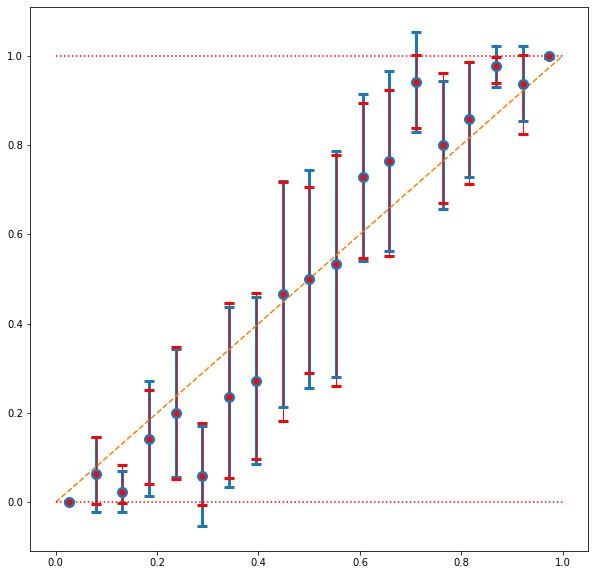

In [100]:
# calculate error bars
bootstrap_election_agg = bootstrap_election_100_agg.apply(bootstrap_error_bars,axis=1)

plt.figure(figsize=(10, 10))
plt.errorbar(midpoints, 
             election_agg['mean'].values, 
             yerr=election_agg['err'].values, 
             fmt='.', elinewidth=3, ms=20, 
             capsize=5, capthick=3)
# Overlay empirical error bars on the same plot. Use the following 
# visual attributes: 
# ..., fmt='.r', elinewidth=1, ms=10, ecolor='red', capsize=5, ...
plt.errorbar(midpoints, 
             election_agg['mean'].values, 
             yerr=bootstrap_election_agg.drop('mean',axis=1).transpose().values, 
             fmt='.r', elinewidth=1, ms=10, ecolor="red", 
             capsize=5, capthick=3)
plt.plot([0, 1], [0, 1], '--')
plt.plot([0, 1], [1, 1], ':r')
plt.plot([0, 1], [0, 0], ':r')
plt.show()

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 1c: Interpreting the Results

Are the 95% confidence intervals generally larger or smaller for more confident predictions (e.g. the predictions closer to 0 or 1).  What are the factors that determine the length of the error bars?

Compare and contrast model-based error bars and empirically obtained error bars. What are the advantages and disadvantages of these two approaches?

<!--
BEGIN QUESTION
name: q1c
manual: true
points: 5
-->

The 95% confidence intervals are generally smaller for more confident predictions as it can be seen above. The factors that determine the lengh of error bars is how spread out the data is and the number of observations available. Empirical obtained error bars are a better fit for a specific instance of data since you derive it from the data itself. Model-based is better for the overall problem you are trying to solve since it is based on multiple instances of the data and gives a better idea of the model as a whole.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

## Part 2: Revisiting Recommender System

### Question 2a: Using Linear Algebra for Optimization
In recommender system module, low-rank matrix factorization was used to execute latent factor modeling of movie ratings data.

Specifically, we calculated matrices $U$ and $V$ to solve the following optimization problem (if all ratings were given):
$$
\begin{aligned}
\min_{U,V} f(U,V) &= \min_{U,V} \|R - V U^T\|_F^2
=\min_{U,V} \left\{ \sum_{m=1}^M\sum_{i=1}^I (r_{mi} - v_m u_i^T)^2 \right\}.
\end{aligned}
$$
The best $U$ and $V$ were calculated iteratively by improving on current estimates:
$$
\begin{aligned}
u_i^{\text{new}} &= u_i + 2\alpha(r_{mi} -  v_m u_i^T)\cdot v_m\\
v_m^{\text{new}} &= v_m + 2\alpha(r_{mi} -  v_m u_i^T)\cdot u_i,
\end{aligned}
$$
where $\alpha$ is the step-size that is to be chosen by the user. (We won't discuss the role in this class, but treat it as an arbitrary, but given, parameter) 

We can make calculating the updates more efficient by calculating them with matrix operations. For example, instead of calculating each deviation $\gamma_{mi} = r_{mi} - v_m u_i^T$ separately for all $m=1,2,\dots,M$ and $i=1,2,\dots,I$, matrix $\Gamma$ of all deviations can be computed together using matrix operation _(verify for yourself)_:
$$\Gamma = R - VU^T$$

Similarly, updating $U$ and $V$ can be combined into matrix calculations which makes the optimization procedure more efficient.

First, note that updates for $u_i$, $i=1,2,\dots,I$ can be rewritten as
$$
\begin{aligned}
u_1^{\text{new}} &= u_1 + 2\alpha\gamma_{m1}\cdot v_m\\
u_2^{\text{new}} &= u_2 + 2\alpha\gamma_{m2}\cdot v_m\\
\vdots\quad &\qquad\qquad\vdots\\
u_I^{\text{new}} &= u_I + 2\alpha\gamma_{mI}\cdot v_m.
\end{aligned}
$$
Stacking all $I$ equations into a matrix form, 
$$
\begin{aligned}
U^{\text{new}} &= U + 2\alpha\Gamma_{m-}^T v_m,
\end{aligned}
$$
where $\Gamma_{m-}$ is the $m$-th row of $\Gamma$ (use the notation $\Gamma_{-i}$ for the $i$-th column).

Note that there are $M$ such update equations (one for each $m=1,2,\dots,M$) that can also be combined into one matrix update equation involving matrices $U$, $V$, $\Gamma$ and scalars. As stated earlier, since $\alpha$ is assumed to be an arbitrary step-size parameter, we can replace $\alpha/M$ with $\alpha$.

Complete the following update equations:
$$
\begin{aligned}
U^{\text{new}} &= U + 2\alpha[\text{some function of }\Gamma][\text{some function of }V]\\
V^{\text{new}} &= V + 2\alpha[\text{some function of }\Gamma][\text{some function of }U]
\end{aligned}
$$

<!--
BEGIN QUESTION
name: q2a
manual: true
points: 4
-->

$$ U + 2\alpha\Gamma^TV $$
$$ V + 2\alpha\Gamma U $$


<!-- END QUESTION -->

### Question 2b: Implementing Updates

In this problem, you will implement the updates calculated in the previous problem. Define the following three functions:

* `update_G(R, U, V)`: computes deviation $R-VU^T$
* `update_U(G, U, V, alpha=0.01)`: calculates update $U^{\text{new}}$
* `update_V(G, U, V, alpha=0.01)`: calculates update $V^{\text{new}}$

Each function should only be one line of matrix operations. Three functions is to be applied sequentially, using the most up-to-date estimates of $G$, $U$, and $V$.

Since some elements of `R` are `np.nan` for any missing ratings, `update_U` and `update_V` functions need to be adjusted by using `numpy.nan_to_num` function where appropriate. The function `numpy.nan_to_num` will let you replace `NaN` to some number, so that missing ratings do not interfere with updates.

<!--
BEGIN QUESTION
name: q2b
manual: false
points: 4
-->

In [101]:
def update_G(R_, U_, V_):
    
    return R_ - V_@U_.T

def update_U(G_, U_, V_, alpha=0.01):
    
    return U_ + 2*alpha*np.nan_to_num(G_).T@V_

def update_V(G_, U_, V_, alpha=0.01):
    
    return V_ + 2*alpha*np.nan_to_num(G_)@U_

# small test to help debug (keep intact)
np.random.seed(1)

M_ = 5
I_ = 3
K_ = 2

R_ = np.random.rand(M_, I_).round(1)
R_[0, 0] = R_[3, 2] = np.nan
U_ = np.random.rand(I_, K_).round(1)
V_ = np.random.rand(M_, K_).round(1)
G_ = update_G(R_, U_, V_)

In [102]:
grader.check("q2b")

q2b passed!

### Question 2c: Construct Optimization Algorithm

Combine the above functions to implement the optimization algorithm to iteratively compute $U$ and $V$.

But, first, here are functions that will calculate RMSE and quantify the maximum update (in absolute value) made by `update_U` and `update_V` after they are called.

In [103]:
def rmse(X):
    """
    Computes root-mean-square-error, ignoring nan values
    """
    return np.sqrt(np.nanmean(X**2))

def max_update(X, Y, relative=True):
    """
    Compute elementwise maximum update
    
    parameters:
    - X, Y: numpy arrays or vectors
    - relative: [True] compute relative magnitudes
    
    returns
    - maximum difference between X and Y (relative to Y) 
    
    """
    if relative:
        updates = np.nan_to_num((X - Y)/Y)
    else:
        updates = np.nan_to_num(X - Y)
            
    return np.linalg.norm(updates.ravel(), np.inf)

A template for the optimization algorithm is given below. Fill-in the missing portions to complete the algorithm.

<!--
BEGIN QUESTION
name: q2c1
manual: false
points: 4
-->

In [104]:
def compute_UV(Rdf, K=5, alpha=0.01, max_iteration=5000, diff_thr=1e-3):

    R = Rdf.values
    Rone = Rdf.replace(Rdf, 1) # keep data frame metadata

    M, I = R.shape            # number of movies and users
    U = np.random.rand(I, K)  # initialize with random numbers
    V = np.random.rand(M, K)  # initialize with random numbers
    G = update_G(R, U, V)     # calculate residual

    track_rmse = []
    track_update = []
    for i in range(0, max_iteration): 
        
        Unew = update_U(G,U,V,alpha)
        Gnew = update_G(R,Unew,V)

        Vnew = update_V(Gnew,Unew,V,alpha)
        Gnew = update_G(R,Unew,Vnew)

        track_rmse += [{
            'iteration':i, 
            'rmse': rmse(Gnew),
            'max residual change': max_update(Gnew, G, relative=False)
        }]
        track_update += [{
            'iteration':i, 
            'max update':max(max_update(Unew, U), max_update(Vnew, V))
        }]

        U = Unew
        V = Vnew
        G = Gnew
        
        if track_update[-1]['max update'] < diff_thr:
            break
        
    track_rmse = pd.DataFrame(track_rmse)
    track_update = pd.DataFrame(track_update)
    
    kindex = pd.Index(range(0, K), name='k')
    U = pd.DataFrame(U, index=Rdf.columns, columns=kindex)
    V = pd.DataFrame(V, index=Rdf.index, columns=kindex)
    
    return {
        'U':U, 'V':V,
        'rmse': track_rmse,
        'update': track_update
    }
 
Rsmall = pd.read_pickle('ratings_stacked_small.pkl').unstack()

np.random.seed(134) # set seed for tests
output1 = compute_UV(Rsmall, K=10, alpha=0.001)

In [105]:
grader.check("q2c1")

q2c1 passed!

Running the function on a different sized problem to check if `compute_UV` adapts to changing problem sizes.
There is nothing new to do here

<!--
BEGIN QUESTION
name: q2c2
manual: false
points: 4
-->

In [106]:
# These tests should pass if `compute_UV` works properly
np.random.seed(134) # set seed for tests
output2 = compute_UV(Rsmall.iloc[:7, :5], K=8)

In [107]:
grader.check("q2c2")

q2c2 passed!

### Question 2d: Interpret Diagnostic Plots

Following figures tell us if the optimization algorithm is working properly.

In [108]:
import altair as alt
logscale = alt.Scale(type='log', base=10)
fig_rmse = \
    alt.Chart(output1['rmse'])\
    .mark_line()\
    .encode(
        x='iteration:Q', 
        y=alt.Y('rmse:Q', scale=logscale)
    )
fig_max_residual_change = \
    alt.Chart(output1['rmse'])\
    .mark_line()\
    .encode(
        x='iteration:Q', 
        y=alt.Y('max residual change:Q', scale=logscale)
    )
fig_updates = \
    alt.Chart(output1['update'])\
    .mark_line()\
    .encode(
        x='iteration:Q', 
        y=alt.Y('max update:Q', scale=logscale)
    )
alt.vconcat(
    fig_rmse | fig_max_residual_change,
    fig_updates 
)

alt.VConcatChart(...)

<!-- BEGIN QUESTION -->

By referring back to the function used to calculate the quantities in each figure, describe what each figure is showing and interpret the behavior of the optimization algorithm.

<!--
BEGIN QUESTION
name: q2d
manual: true
points: 4
-->

The RMSE graph is showing that as we include more iterations the RMSE will decrease indicating a better fit to the data. The max update graph is keeping track of the number of updates that occur for each iteration. The max residual change graph keeps track of how much the residuals vary from each iteration.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 2e: Logistic function 

Note the reconstructed ratings can be smaller than 1 and greater than 5. To confine ratings to between the allowed range, we can use the logistic function. Logistic function is defined as 
$$ h(x) = \frac{1}{1+e^{-x}}. $$
It is straightforward to show the derivative is 
$$ h'(x) = \frac{e^{-x}}{(1+e^{-x})^2} = h(x)(1-h(x)). $$
Therefore, we can rescale the ratings from $r_{mi}\in [1, 5]$ to $r_{mi}\in [0, 1]$. Then, we can find the best $U$ and $V$ to optimize the following:
$$ \min_{U,V} \| R - h(VU^T) \|_F^2 = \sum_{m,i} (r_{mi} - h(v_m u_i^T))^2, $$
where function $h$ is applied elementwise.

According to the new objective function, rewrite update functions analytically.
<!--
BEGIN QUESTION
name: q2e1
manual: true
points: 4
-->

$$  R - h(VU^T) $$
$$ U - \alpha*(-2*G*h(VU^T)*(1-h(VU^T))^T*V$$
$$ V - \alpha*(-2*G*h(VU^T)*(1-h(VU^T))*U $$

<!-- END QUESTION -->

Implement the update functions in functions below.

<!--
BEGIN QUESTION
name: q2e2
manual: false
points: 4
-->

In [109]:
def logistic(x):
    """
    Evaluates logistic function
    
    """
    return 1/(1+np.exp(-x))

def update_logistic_G(R_, U_, V_):
    
    return R_ - logistic(V_@U_.T)

def update_logistic_U(G_, U_, V_, alpha=0.01):
    
    logisticVUT = logistic(V_@U_.T)             # estimated ratings
    grad = -2 * np.nan_to_num(G_*logisticVUT*(1-logisticVUT)) # gradient direction
    return U_ - alpha*grad.T@V_                     # gradient descent update from U_

def update_logistic_V(G_, U_, V_, alpha=0.01):
    
    logisticVUT = logistic(V_@U_.T)              # estimated ratings
    grad = -2 * np.nan_to_num(G_*logisticVUT*(1-logisticVUT)) # gradient direction
    return V_ - alpha*grad@U_                    # gradient descent update from V_

# small test to help debug (keep intact)
np.random.seed(1)

M_ = 5
I_ = 3
K_ = 2

R_ = np.random.rand(M_, I_).round(1)
R_[0, 0] = R_[3, 2] = np.nan
U_ = np.random.rand(I_, K_).round(1)
V_ = np.random.rand(M_, K_).round(1)
G_ = update_G(R_, U_, V_)

In [110]:
grader.check("q2e2")

q2e2 passed!

Now create a function `compute_logistic_UV` below:

<!--
BEGIN QUESTION
name: q2e3
manual: false
points: 4
-->

In [111]:
def compute_logistic_UV(Rdf, K=5, alpha=0.01, max_iteration=5000, diff_thr=1e-3):

    R = Rdf.values
    R = (R.copy()-1)/4         # map ratings to between 0 and 1
    Rone = Rdf.replace(Rdf, 1) # keep data frame metadata

    M, I = R.shape                 # number of movies and users
    U = np.random.rand(I, K)-0.5   # initialize with random numbers
    V = np.random.rand(M, K)-0.5   # initialize with random numbers
    G = update_G(R, U, V)          # calculate residual

    track_rmse = []
    track_update = []
    for i in range(0, max_iteration): 
        
        Unew = update_logistic_U(G, U, V, alpha)
        Gnew = update_logistic_G(R,Unew,V)

        Vnew = update_logistic_V(Gnew,Unew,V,alpha)
        Gnew = update_logistic_G(R,Unew,Vnew)

        track_rmse += [{
            'iteration':i, 
            'rmse': rmse(Gnew),
            'max residual change': max_update(Gnew, G, relative=False)
        }]
        track_update += [{
            'iteration':i, 
            'max update':max(max_update(Unew, U), max_update(Vnew, V))
        }]

        U = Unew
        V = Vnew
        G = Gnew
        
        if track_update[-1]['max update'] < diff_thr:
            break
        
    track_rmse = pd.DataFrame(track_rmse)
    track_update = pd.DataFrame(track_update)
    
    kindex = pd.Index(range(0, K), name='k')
    U = pd.DataFrame(U, index=Rdf.columns, columns=kindex)
    V = pd.DataFrame(V, index=Rdf.index, columns=kindex)
    
    return {
        'U':U, 'V':V,
        'rmse': track_rmse,
        'update': track_update
    }

def logistic_rating(U_, V_):
    """
    converts the rating back to 1 to 5 rating
    """
    return( 4*logistic(V_@U_.T) + 1 )
    
np.random.seed(134) # set seed for tests
output3 = compute_logistic_UV(Rsmall, K=10, alpha=0.05)

In [112]:
grader.check("q2e3")

q2e3 passed!

### Question 2f: Analyze Large Dataset

Following code will analyze a larger dataset:

In [ ]:
# run on larger dataset: ratings for 100 movies 
Rbig = pd.read_pickle('ratings_stacked.pkl').unstack().iloc[:100]

np.random.seed(14) # set seed for tests
output4 = compute_logistic_UV(Rbig, K=5, alpha=0.05, max_iteration=500)

Rhatbig = logistic_rating(output4['U'], output4['V'])

In [ ]:
fit_vs_obs = pd.concat([
    Rhatbig.rename(columns={'rating':'fit'}),
    Rbig.rename(columns={'rating':'observed'}),
], axis=1).stack().dropna().reset_index()[['fit','observed']]

fit_vs_obs = fit_vs_obs.iloc[np.random.choice(len(fit_vs_obs), 5000)]

alt.Chart(fit_vs_obs).transform_density(
    density='fit',
    bandwidth=0.2,
    groupby=['observed'],
    extent= [1, 5]
).mark_area().encode(
    alt.X('value:Q', ),
    alt.Y('density:Q'),
    alt.Row('observed:N', )
).properties(width=400, height=50)

<!-- BEGIN QUESTION -->

Consider the above plot. By reading the code, comment on what the plot is illustrating. What happens when you add `counts=True` to `transform_density`? What can you conclude?

<!--
BEGIN QUESTION
name: q2f
manual: true
points: 4
-->

The plot is illustrating the kernel density estimation over the data supplied with probability estimates plotted. When you add counts=True the plot changes by plotting values by their counts making it more smooth. It looks to me that a lot of people have rated their movies mostly between 3.5 and 5.0.

<!-- END QUESTION -->

<!-- BEGIN QUESTION -->

### Question 2g: Make Recommendation

What movies would you recommend to `user id` 601? Do you see any similarities to movies the user rated high?

<!--
BEGIN QUESTION
name: q2g
manual: true
points: 4
-->

I would recommend Richard III and Seven. I noticed that the movies the user rated high were mostly movies that invloved some sort of action in them.

In [ ]:
Rbig.iloc[:,600].head(60)

In [ ]:
Rhatbig.iloc[:,600].head(60)

<!-- END QUESTION -->



_Cell Intentionally Blank_

---

To double-check your work, the cell below will rerun all of the autograder tests.

In [ ]:
grader.check_all()

## Submission

Make sure you have run all cells in your notebook in order before running the cell below, so that all images/graphs appear in the output. The cell below will generate a zip file for you to submit. **Please save before exporting!**

In [ ]:
# Save your notebook first, then run this cell to export your submission.
grader.export()